In [1]:
%pip install pandas transformers
%pip install torch
%pip install tensorflow
%pip install tf-keras
import pandas as pd
import re

from transformers import pipeline


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for tf-keras from https://files.pythonhosted.org/packages/8a/ed/e08afca471299b04a34cd548e64e89d0153eda0e6cf9b715356777e24774/tf_keras-2.18.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.7 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated 

In [2]:
tesla_tweets = pd.read_csv('tesla_and_others.csv')
print(tesla_tweets.head())

                        Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.  


In [3]:
tesla_tweets = tesla_tweets[tesla_tweets['Stock Name'] == 'TSLA']
print(tesla_tweets.head())

                        Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.  


In [4]:
tesla_tweets['Tweet'] = tesla_tweets['Tweet'].apply(lambda x: re.sub(r'http\S+|www.\S+|@\w+|#\w+', '', x))
tesla_tweets['Tweet'] = tesla_tweets['Tweet'].str.lower()
tesla_tweets['Date'] = pd.to_datetime(tesla_tweets['Date']).dt.date
print(tesla_tweets['Date'].head())

0    2022-09-29
1    2022-09-29
2    2022-09-29
3    2022-09-29
4    2022-09-29
Name: Date, dtype: object


In [5]:
tesla_tweets = tesla_tweets.dropna(subset=['Tweet', 'Date']).drop_duplicates()
tesla_tweets = tesla_tweets.drop_duplicates(subset='Tweet')
tesla_tweets = tesla_tweets.drop(columns=['Stock Name', 'Company Name'], errors='ignore')
print(tesla_tweets.head())

         Date                                              Tweet
0  2022-09-29  mainstream media has done an amazing job at br...
1  2022-09-29  tesla delivery estimates are at around 364k fr...
2  2022-09-29  3/ even if i include 63.0m unvested rsus as of...
3  2022-09-29     hahaha why are you still trying to stop tes...
4  2022-09-29    stop trying to kill kids, you sad deranged o...


In [6]:
num_rows = tesla_tweets.shape[0]
start_date = tesla_tweets['Date'].min()
end_date = tesla_tweets['Date'].max()

print(f'Number of rows in the cleaned data: {num_rows}')
print(f'Start date of tweets: {start_date}')
print(f'End date of tweets: {end_date}')

Number of rows in the cleaned data: 37106
Start date of tweets: 2021-09-30
End date of tweets: 2022-09-29


In [7]:
# load FinBERT model for sentiment analysis
# sentiment_pipeline = pipeline('sentiment-analysis', model='yiyanghkust/finbert-tone', tokenizer='yiyanghkust/finbert-tone', device=0)
sentiment_pipeline = pipeline('sentiment-analysis', model='yiyanghkust/finbert-tone', tokenizer='yiyanghkust/finbert-tone')

# run sentiment classification on the 'Tweet' column in batches with truncation
sentiment_pipeline.tokenizer.model_max_length = 512
sentiment_pipeline.tokenizer.truncation = True
batch_size = 16
tweet_texts = tesla_tweets['Tweet'].tolist()

sentiment_results = []
for i in range(0, len(tweet_texts), batch_size):
    print(f'Start: i={i}')
    batch = tweet_texts[i:i + batch_size]
    sentiments = sentiment_pipeline(batch, truncation = True)
    sentiment_results.extend(sentiments)
    print(f'End: i={i}')

tesla_tweets['Sentiment'] = [result['label'] for result in sentiment_results]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Start: i=0
End: i=0
Start: i=16
End: i=16
Start: i=32
End: i=32
Start: i=48
End: i=48
Start: i=64
End: i=64
Start: i=80
End: i=80
Start: i=96
End: i=96
Start: i=112
End: i=112
Start: i=128
End: i=128
Start: i=144
End: i=144
Start: i=160
End: i=160
Start: i=176
End: i=176
Start: i=192
End: i=192
Start: i=208
End: i=208
Start: i=224
End: i=224
Start: i=240
End: i=240
Start: i=256
End: i=256
Start: i=272
End: i=272
Start: i=288
End: i=288
Start: i=304
End: i=304
Start: i=320
End: i=320
Start: i=336
End: i=336
Start: i=352
End: i=352
Start: i=368
End: i=368
Start: i=384
End: i=384
Start: i=400
End: i=400
Start: i=416
End: i=416
Start: i=432
End: i=432
Start: i=448
End: i=448
Start: i=464
End: i=464
Start: i=480
End: i=480
Start: i=496
End: i=496
Start: i=512
End: i=512
Start: i=528
End: i=528
Start: i=544
End: i=544
Start: i=560
End: i=560
Start: i=576
End: i=576
Start: i=592
End: i=592
Start: i=608
End: i=608
Start: i=624
End: i=624
Start: i=640
End: i=640
Start: i=656
End: i=656
Start: i

In [8]:
print(tesla_tweets.head())
sentiment_counts = tesla_tweets['Sentiment'].value_counts()
print(sentiment_counts)

         Date                                              Tweet Sentiment
0  2022-09-29  mainstream media has done an amazing job at br...  Positive
1  2022-09-29  tesla delivery estimates are at around 364k fr...   Neutral
2  2022-09-29  3/ even if i include 63.0m unvested rsus as of...   Neutral
3  2022-09-29     hahaha why are you still trying to stop tes...   Neutral
4  2022-09-29    stop trying to kill kids, you sad deranged o...   Neutral
Sentiment
Neutral     27413
Positive     6899
Negative     2794
Name: count, dtype: int64


In [32]:
tesla_stock_data = pd.read_csv('tesla_historical_stock_prices.csv')
print(tesla_stock_data.head())

        Date    Open    High     Low  Close   Adj Close       Volume
0  29-Sep-22  282.76  283.65  265.78  268.21      268.21  77,620,600
1  28-Sep-22  283.08  289.00  277.57  287.81      287.81  54,664,800
2  27-Sep-22  283.84  288.67  277.51  282.94      282.94  61,925,200
3  26-Sep-22  271.83  284.09  270.31  276.01      276.01  58,076,900
4  23-Sep-22  283.09  284.50  272.82  275.33      275.33  63,748,400


In [33]:
tesla_stock_data['Date'] = pd.to_datetime(tesla_stock_data['Date'], format='%d-%b-%y')
tesla_stock_data.columns = tesla_stock_data.columns.str.strip()
tesla_stock_data = tesla_stock_data[['Date', 'Adj Close', 'Volume']].copy()
tesla_stock_data.rename(columns={'Adj Close': 'Price'}, inplace=True)
print(tesla_stock_data.head())

        Date   Price      Volume
0 2022-09-29  268.21  77,620,600
1 2022-09-28  287.81  54,664,800
2 2022-09-27  282.94  61,925,200
3 2022-09-26  276.01  58,076,900
4 2022-09-23  275.33  63,748,400


In [41]:
tesla_stock_data = tesla_stock_data.set_index('Date').asfreq('D').reset_index().interpolate()
print("Volume data after interpolation:") 
print(tesla_stock_data['Volume'].head(10))


Volume data after interpolation:
0    53868000.0
1    51094200.0
2    64546100.0
3    77998000.0
4    91449900.0
5    55297800.0
6    43898400.0
7    57587400.0
8    50215800.0
9    47677500.0
Name: Volume, dtype: float64


In [74]:
tesla_sentiment_data = tesla_tweets[['Date', 'Sentiment']]

# convert sentiment labels to numeric values
sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
tesla_sentiment_data['sentiment_numeric'] = tesla_sentiment_data['Sentiment'].map(sentiment_mapping)
# make sure dates are in the right format
tesla_stock_data['Date'] = pd.to_datetime(tesla_stock_data['Date'])
tesla_sentiment_data['Date'] = pd.to_datetime(tesla_sentiment_data['Date'])
# aggregate sentiment scores by date (taking the average sentiment for each day)
daily_sentiment = tesla_sentiment_data.groupby('Date')['sentiment_numeric'].mean().reset_index()

daily_sentiment.rename(columns={'sentiment_numeric': 'daily_sentiment'}, inplace=True)
# interpolate missing prices
tesla_stock_data = tesla_stock_data.set_index('Date').asfreq('D')
tesla_stock_data = tesla_stock_data.infer_objects(copy=False)
tesla_stock_data['Price'] = pd.to_numeric(tesla_stock_data['Price'], errors='coerce')
tesla_stock_data['Volume'] = pd.to_numeric(tesla_stock_data['Volume'], errors='coerce')
tesla_stock_data = tesla_stock_data.interpolate().reset_index()
# merge Tesla stock data with sentiment data on date
merged_data = pd.merge(tesla_stock_data, daily_sentiment, on='Date', how='inner')
merged_data['Volume'] = merged_data['Volume'].fillna(merged_data['Volume'].median())
print(merged_data.head())

        Date   Price      Volume  daily_sentiment
0 2021-09-30  258.49  53868000.0         0.133333
1 2021-10-01  258.41  51094200.0         0.148936
2 2021-10-02  259.11  64546100.0         0.295652
3 2021-10-03  259.81  77998000.0         0.278689
4 2021-10-04  260.51  91449900.0         0.169492


In [75]:
%pip install scikit-learn
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_data[['Price', 'Volume', 'daily_sentiment']])


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [76]:
def prepare_sequences(data, lookback):
    X, y = [], [] 
    for i in range(len(data) - lookback): 
        X.append(data[i:i+lookback]) 
        y.append(data[i+lookback, 0]) # Predicting 'Price' 
    return np.array(X), np.array(y) 

lookback = 7 
X, y = prepare_sequences(scaled_data, lookback) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) 
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32) 
y_train, y_test = torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)


In [113]:
# Define the Transformer model
class StockPriceTransformer(nn.Module):
    def __init__(self, input_size, num_heads, hidden_dim, num_layers, output_size, dropout=0.1):
        super(StockPriceTransformer, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_dim)
        self.transformer_layer = nn.TransformerEncoderLayer(
            d_model=hidden_dim, nhead=num_heads, dim_feedforward=hidden_dim * 4, dropout=dropout
        )
        self.transformer = nn.TransformerEncoder(self.transformer_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        x = self.embedding(x)  # Linear layer for initial embedding
        x = x.permute(1, 0, 2)  # Transformer expects input of shape (seq_len, batch_size, feature_size)
        x = self.transformer(x)
        x = x.permute(1, 0, 2)  # Reshape back to (batch_size, seq_len, feature_size)
        x = self.fc_out(x[:, -1, :])  # Output corresponding to the last time step
        return x
if np.any(np.isnan(X_train.numpy())) or np.any(np.isnan(y_train.numpy())): 
    print("Warning: NaN values found in the training data.") 
if np.any(np.isinf(X_train.numpy())) or np.any(np.isinf(y_train.numpy())): 
    print("Warning: Infinity values found in the training data.")
# Hyperparameters for Transformer
input_size = 3 #X_train.shape[2]  
num_heads = 8
hidden_dim = 128
num_layers = 4
output_size = 1
dropout = 0.3
learning_rate = 5e-4
num_epochs = 200

# Initialize the model, loss function, and optimizer
model = StockPriceTransformer(input_size, num_heads, hidden_dim, num_layers, output_size, dropout)
# Initialize weights explicitly for stability 
def init_weights(m): 
    if isinstance(m, nn.Linear): 
        torch.nn.init.xavier_uniform_(m.weight) 
        if m.bias is not None: 
            m.bias.data.fill_(0.01) 
model.apply(init_weights)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses, val_losses = [], []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train)
    loss = criterion(output.flatten(), y_train)

    if torch.isnan(loss): 
        print(f"NaN loss encountered at epoch {epoch}. Stopping training.") 
        break

    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()

    

# Validation
    model.eval()
    with torch.no_grad():
        val_output = model(X_test)
        val_loss = criterion(val_output.flatten(), y_test)
    train_losses.append(loss.item()) 
    val_losses.append(val_loss.item())
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [0/200], Loss: 1.5537461042404175, Validation Loss: 9.611199378967285
Epoch [10/200], Loss: 0.529871940612793, Validation Loss: 0.011206238530576229
Epoch [20/200], Loss: 0.2527724504470825, Validation Loss: 0.00978834554553032
Epoch [30/200], Loss: 0.15380866825580597, Validation Loss: 0.1222991943359375
Epoch [40/200], Loss: 0.11786235123872757, Validation Loss: 0.014180954545736313
Epoch [50/200], Loss: 0.0779581218957901, Validation Loss: 0.016028376296162605
Epoch [60/200], Loss: 0.060531917959451675, Validation Loss: 0.01595398224890232
Epoch [70/200], Loss: 0.04880676418542862, Validation Loss: 0.01126301009207964
Epoch [80/200], Loss: 0.04545404762029648, Validation Loss: 0.010622609406709671
Epoch [90/200], Loss: 0.03742096945643425, Validation Loss: 0.009663543663918972
Epoch [100/200], Loss: 0.03217778354883194, Validation Loss: 0.009589086286723614
Epoch [110/200], Loss: 0.030531922355294228, Validation Loss: 0.01101915817707777
Epoch [120/200], Loss: 0.02839892357587


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


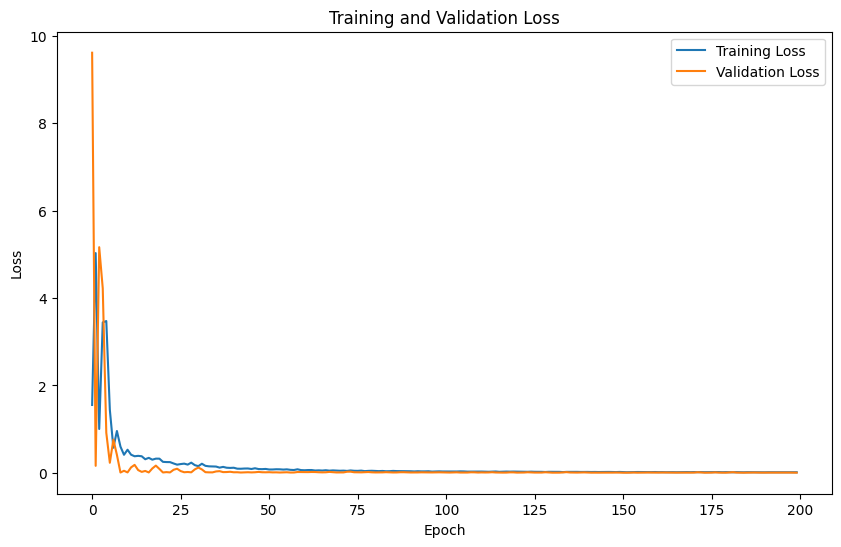

In [114]:
%pip install matplotlib
import matplotlib.pyplot as plt

def plot_transformer_training_history():
    plt.figure(figsize=(10, 6)) 
    plt.plot(train_losses, label='Training Loss') 
    plt.plot(val_losses, label='Validation Loss') 
    plt.xlabel('Epoch') 
    plt.ylabel('Loss') 
    plt.title('Training and Validation Loss') 
    plt.legend() 
    plt.show()

plot_transformer_training_history()

Future Prices: [269.31578231 267.92294867 261.74064024 257.93295707 252.4225806
 244.49826024 235.60134204]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


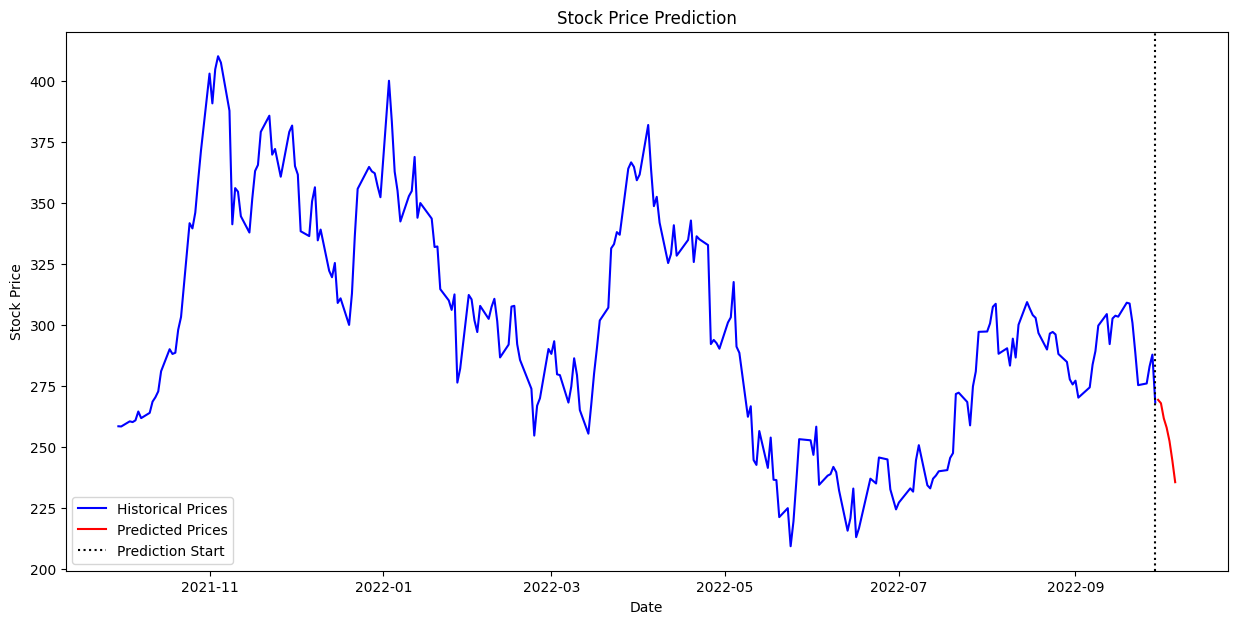

In [115]:
def predict_stock_prices(model, data, lookback, future_days): 
    recent_data = data[-lookback:] 
    recent_scaled = scaler.transform(recent_data) 
    recent_seq = torch.tensor(recent_scaled, dtype=torch.float32).unsqueeze(0) # Shape: (1, lookback, num_features) 
    model.eval() 
    predictions = [] 
    curr_seq = recent_seq 
    
    for _ in range(future_days): 
        with torch.no_grad(): 
            next_price_scaled = model(curr_seq).item() 
        next_price_data = np.array([[next_price_scaled, 0, 0]]) 
        next_price = scaler.inverse_transform(next_price_data)[0][0] 
        predictions.append(next_price) 
        
        next_data = np.array([[next_price_scaled, recent_scaled[-1, 1], recent_scaled[-1, 2]]]) 
        curr_seq = torch.cat((curr_seq[:, 1:, :], torch.tensor(next_data, dtype=torch.float32).unsqueeze(0)), dim=1) 
    return np.array(predictions) 

# Predict and plot future stock prices 
future_days = 7 
future_prices = predict_stock_prices(model, merged_data[['Price', 'Volume', 'daily_sentiment']].values, lookback, future_days) 
print(f'Future Prices: {future_prices}') 

# Plot Predictions 
last_date = pd.to_datetime(merged_data['Date'].max()) 
future_dates = pd.date_range(start=last_date, periods=future_days + 1)[1:] 

plt.figure(figsize=(15, 7)) 
plt.plot(merged_data['Date'], merged_data['Price'], label='Historical Prices', color='blue') 
plt.plot(future_dates, future_prices, label='Predicted Prices', color='red') 
plt.axvline(x=last_date, color='black', linestyle=':', label='Prediction Start') 
plt.title('Stock Price Prediction') 
plt.xlabel('Date') 
plt.ylabel('Stock Price') 
plt.legend() 
plt.show()

In [116]:
def predict_stock_prices_full_range_transformer(model, data, lookback): 
    """ Predict stock prices for future days using the Transformer model. 
    
    Args: 
    model (nn.Module): Trained Transformer model. 
    data (pd.DataFrame): DataFrame with date, price, volume, and daily sentiment. 
    lookback (int): Number of previous days to use for prediction. 
    
    Returns: dict: A dictionary containing dates, actual prices, predicted prices, mse, and mae. """ 
    
    sentiment_data = data['daily_sentiment'].values 
    price_data = data['Price'].values 
    volume_data = data['Volume'].values
    dates = data['Date']

    # Scale data 
    sentiment_scaler = MinMaxScaler(feature_range=(-1, 1)) 
    price_scaler = MinMaxScaler(feature_range=(0, 1)) 
    volume_scaler = MinMaxScaler(feature_range=(0, 1))

    sentiment_scaled = sentiment_scaler.fit_transform(sentiment_data.reshape(-1, 1)) 
    price_scaled = price_scaler.fit_transform(price_data.reshape(-1, 1)) 
    volume_scaled = volume_scaler.fit_transform(volume_data.reshape(-1, 1))

    # Prepare sequences for prediction 
    X, y_actual = [], [] 
    for i in range(len(data) - lookback): 
        input_seq = np.column_stack([
            price_scaled[i:i + lookback].flatten(),
            volume_scaled[i:i + lookback].flatten(),
            sentiment_scaled[i:i + lookback].flatten() 
            ]) 
        X.append(input_seq) 
        y_actual.append(price_scaled[i + lookback]) 
    
    X = np.array(X).reshape(len(X), lookback, 3) 
    
    
    
    # Convert to tensor 
    X_tensor = torch.tensor(X, dtype=torch.float32)

    # Predict using transformer model
    model.eval() 
    with torch.no_grad(): 
        y_pred_scaled = model(X_tensor).numpy() 
    
    # Inverse transform the scaled predictions 
    y_pred = price_scaler.inverse_transform(y_pred_scaled) 
    y_actual = price_scaler.inverse_transform(y_actual) 
    
    # Calculate error metrics 
    mse = np.mean((y_pred - y_actual) ** 2) 
    mae = np.mean(np.abs(y_pred - y_actual)) 
    
    return { 
        'dates': dates[lookback:], 
        'actual_prices': y_actual.flatten(), 
        'predicted_prices': y_pred.flatten(), 
        'mse': mse, 
        'mae': mae 
    }

In [119]:
def plot_price_predictions_transformer(pred_results): 
    """ Plot the historical and future stock prices predicted by the Transformer model. 
    
    Args: pred_results (dict): A dictionary containing dates, actual prices, predicted prices, mse, and mae. """ 
    plt.figure(figsize=(15, 7)) 
    plt.plot(pred_results['dates'], pred_results['actual_prices'], label='Actual Prices', color='blue') 
    plt.plot(pred_results['dates'], pred_results['predicted_prices'], label='Predicted Prices', color='red') 
    
    plt.title('Tesla Stock Prices: Actual vs. Predicted (Transformer Model)') 
    plt.xlabel('Date') 
    plt.ylabel('Stock Price') 
    plt.legend()

    plt.text(0.05, 0.95, 
        f'Mean Squared Error: ${pred_results["mse"]: .2f}\n' 
        f'Mean Absolute Error: ${pred_results["mae"]: .2f}', 
        transform=plt.gca().transAxes, 
        verticalalignment='top', 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)) 
    plt.show()
    



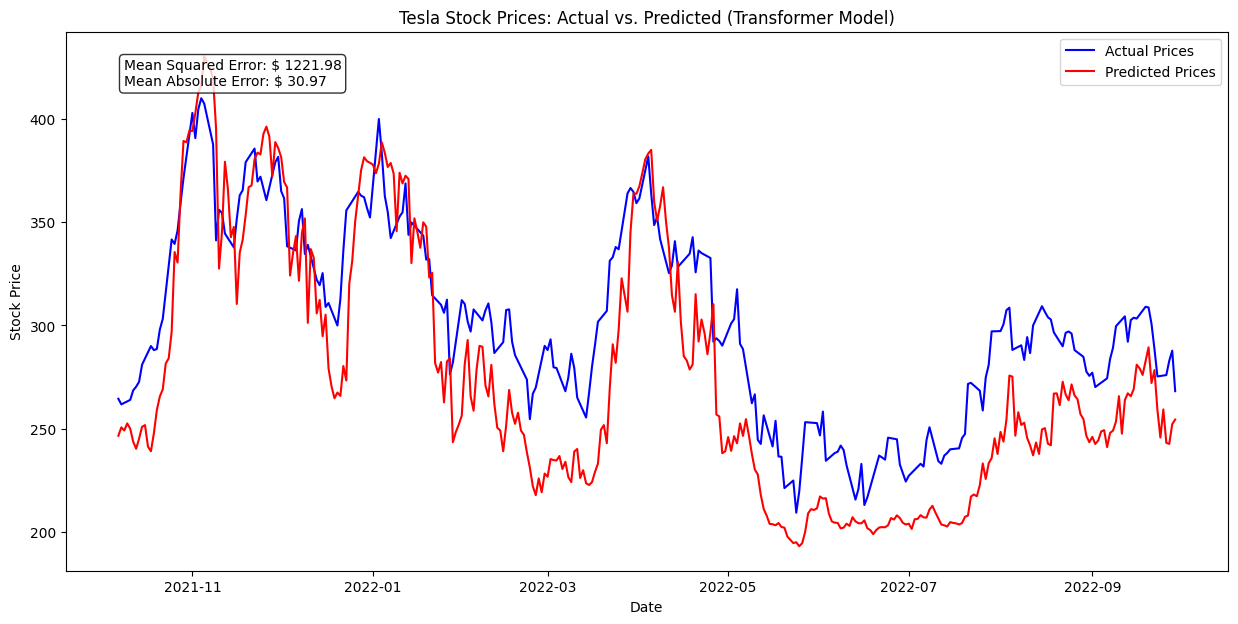

In [120]:
pred_results_transformer = predict_stock_prices_full_range_transformer(model, merged_data, lookback=7)

plot_price_predictions_transformer(pred_results_transformer)